In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
expt_type = 'playfight/without_cover_story/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [3]:
df =  pd.read_csv(f'{rootfile_loc}/data_triallevel_sorted.csv',index_col=[0])
df.head()

,subID,stimset_rows,chargeSpeed,stim_dur,responses,movie,trial_num
1,28000,26,1.5,8234,collided and then bounced off each other,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,1
1,28001,25,1.5,8130,"The dots moved apart, and then came back toget...",e838dadb-c02f-4273-ae93-210720dcd06c,1
3,28002,28,1.5,8325,softy hit twice,b3a507ff-2289-4ad3-8922-1a3d0532e154,3
6,28003,29,1.5,8085,The dots wandered and came together almost inc...,1b1159fc-de2b-4ae5-a736-d98d8524a366,6
4,28004,32,1.5,8069,softer collisons,1f6c6525-a740-48c2-8dfc-9c4fb520c630,4


# exploring the data

In [4]:
param_name = 'chargeSpeed'

In [5]:
df.groupby([param_name]).count()

,subID,stimset_rows,stim_dur,responses,movie,trial_num
chargeSpeed,,,,,,
1.50,103,103,103,103,103,103
2.75,103,103,103,103,103,103
4.00,103,103,103,103,103,103
5.25,103,103,103,103,103,103
6.50,103,103,103,103,103,103
7.75,103,103,103,103,103,103
9.00,103,103,103,103,103,103


In [6]:
resp_len = np.array( [len(i) for i in df['responses']])
# resp_len.min(), df['responses'][resp_len == min(resp_len)] # shortest word
resp_len

array([ 40,  88,  15, 111,  16,  20,  14,  65,  78,  10,  15,   5,   9,
       132,  60,  80,   7,  22,  54, 144,  25,  50,  32,  24,  37, 130,
        63,  39,  83, 114,  30,   7,  31,  21,  29,  15,   7,  59,  71,
        27,  29,   7,  22,   4,  17,  10,  70,  61,  38, 124,  21,  21,
        11,  21,   2,  38,   4,   7,  41, 185,  26,   8,   5,  23,  18,
        80,  52,  69,  56,  15,  62,  15,  12,  51,  10,  39,  34,  58,
        43,  12,  38,  35,  30,  24,  49,  12,  29,  81,  32, 109,  25,
         8,  46,  68,  56,  14,  52,  14,  30,  56,  45,  45,  38,  31,
        69,  21,  37,  43,  28,  14,  54,  97,   8,   9,  21,  45,  72,
        44,  32,   8,  23,  60,  82,  43,  33,  63,  40,  50, 106,  38,
        47,  81, 126,  28,   7,  48,  38,  67,   8,   6,  41,  50,  26,
        22,   8,  14,   8,  28,  30,  38, 169,  36,  68,  22,  22,  37,
        15,   5,  23,  14,   8,  47, 165,  28,  21,   5,  21,  18,  70,
        79,  58,  60,  16,  59,  11,   6,  68,  15,  32,  35,  9

In [7]:
resp_len.max(), df['responses'][resp_len == max(resp_len)].values # longest entry

(312,
 array(['The dots were floating in the center of the box and they moved slowly away from each other before heading towards each other to make contact. After making contact the first time they moved slowly toward the top of the box and away from each other before moving towards each other to make contact the second time.'],
       dtype=object))

In [8]:
resp_len.mean()

44.07212205270458

In [9]:
resp_len.mean(), df['responses'][resp_len ==44].values # average entry

(44.07212205270458,
 array(['the two dots hit eachother but in a soft way',
        'similar to before. slow movement and rebound',
        'The animations were colliding in slow rhythm',
        'the had a gravitational pull if close enough',
        'grey dot was responding to black dot attacks'], dtype=object))

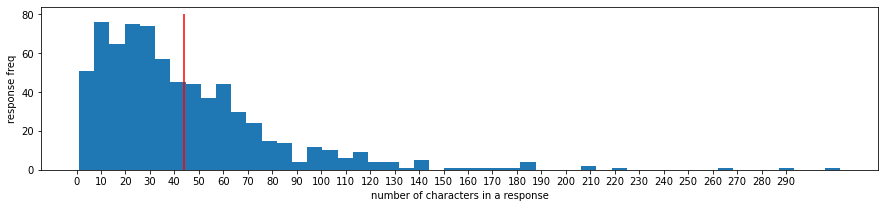

In [10]:
plt.figure(figsize=(15,3))
plt.hist(resp_len,bins=50)
plt.xticks(np.arange(0,300,10))
plt.xlabel('number of characters in a response')
plt.ylabel('response freq')
plt.vlines(resp_len.mean(),0,80, color = 'r')

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
pd.options.mode.chained_assignment = None  # default='warn'
import nltk
from nltk.corpus import stopwords

stopwords = set(STOPWORDS)
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice',
    'moving','moved']
#stopwords.update(["br", "href", "a", "an", "the"] + excluded_words_list)

## Word clouds

In [12]:
out_loc = f'../../results/text_analysis/pf/no_cover_story/'

In [16]:
param_name = 'chargeSpeed' #chargeSpeed

chargeSpeed 9.0
chargeSpeed 7.75
chargeSpeed 6.5
chargeSpeed 5.25
chargeSpeed 4.0
chargeSpeed 2.75
chargeSpeed 1.5


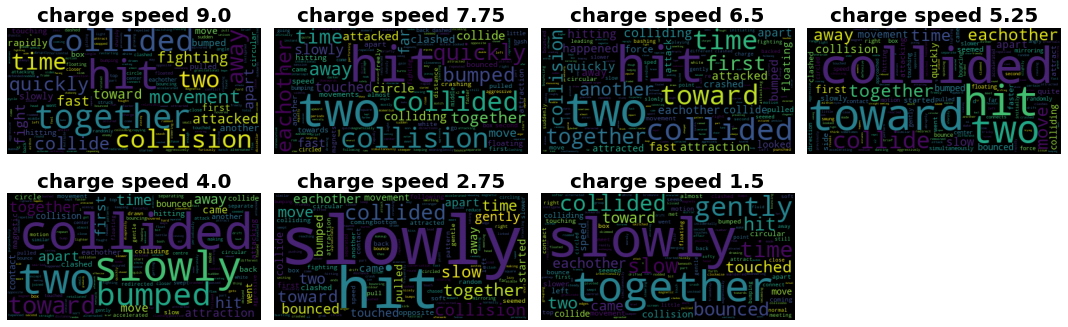

In [28]:
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows = nrows, ncols = ncols,figsize=(15,5))
# plt.suptitle(param_name, fontsize = 40,fontweight='bold')

for i,subt in enumerate(np.unique(df[param_name])[::-1]):
    r = int(np.floor(i/ncols))
    c = i%ncols
    ax = axs[r,c]
    print(param_name, subt)
    rows = df.loc[:,param_name] == subt
    df_subt = df.loc[rows,:]
    
    nchar = np.array([ len(i) for ind,i in enumerate(df_subt['responses']) ])
    txt = ' '.join(df_subt['responses']) # one long string
    txt = txt.lower()
    for words in excluded_words_list:
       txt = txt.replace(words,'')

    wordcloud2 = WordCloud(random_state=1).generate(txt)
    # Generate plot
    ax.imshow(wordcloud2)
    ax.axis("off")
    #ax.set_title('Subtlety ' + str(subt) + '(n=' + str(len(nchar)-too_few_char) + '/ ' + str(len(nchar)) + ')')
    ax.set_title(f'charge speed {subt}',fontsize=20,fontweight='bold')
    ax.set_aspect('equal')
    
axs[1,3].set_visible(False)

plt.tight_layout()
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=.9, 
#                     top=0.9, 
#                     wspace=0.2, 
#                     hspace=0.1)

plt.savefig(f'{out_loc}wordcloud.png')


In [19]:
color_plots = 'tab:red' # or tab:red

In [20]:
s=12 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [21]:
ref_words = ['play','fight','wander','move','independent']
words = df['responses']
df['play_bool'] = [1 if ('play' in i)|('playing' in i) else 0 for i in words ]
df['fight_bool'] =  [1 if ('fight' in i) |('fighting'   in i) else 0 for i in words ]
df['wander_bool'] = [1 if ('wander' in i)|('hitting' in i) else 0 for i in words ]
df['move_bool'] = [1 if ('move' in i)|('moving' in i) else 0 for i in words ]
df['independent_bool'] = [1 if ('independent' in i)|('independently' in i) else 0 for i in words ]

In [22]:
inds = [[0,0],[0,1],[1,0],[1,1],[1,2]]
words_pos_dict = dict(zip(ref_words,inds))
words_pos_dict

{'play': [0, 0],
 'fight': [0, 1],
 'wander': [1, 0],
 'move': [1, 1],
 'independent': [1, 2]}

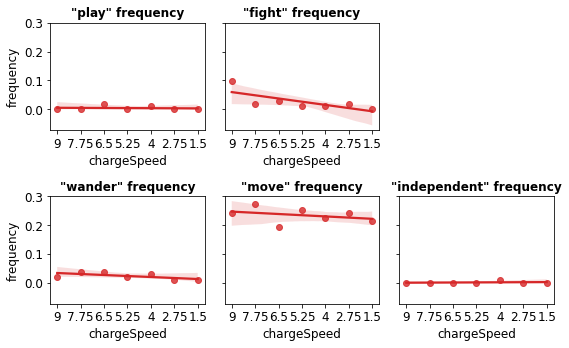

In [26]:
nrows,ncols = 2,3
fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (8,5), sharey = True)

for i,word in enumerate(ref_words):
    r,c = words_pos_dict[word]
    ax = axs[r,c]
    sns.regplot(data=df.groupby([param_name]).mean().reset_index(),x = param_name,y = word + '_bool',\
        ax=ax,marker = 'o', color = color_plots)
    ax.set_xticks(np.unique(df[param_name]))
    ax.set_title(f'"{word}" frequency', fontweight = 'bold')
    if c ==0:
        ax.set_ylabel('frequency')
    else:
        ax.set_ylabel('')
    ax.set_yticks([0,0.1, 0.2,0.3])
    ax.set_xticks(np.arange(1.5,9.1,1.25),['1.5','2.75','4','5.25','6.5','7.75','9'])
    ax.invert_xaxis()

axs[0,2].axis('off')

plt.tight_layout()
plt.savefig(f'{out_loc}word_frequency.png',dpi=300,bbox_inches ='tight')

In [27]:
from pymer4.models import Lmer
from pymer4.stats import vif
from scipy.stats import zscore

In [29]:
df[param_name] = zscore(df[param_name])

In [30]:
ref_words

['play', 'fight', 'wander', 'move', 'independent']

In [32]:
word = ref_words[0]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)+ (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: play_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: -19.398 	 AIC: 46.796

Random effects:

              Name  Var  Std
movie  (Intercept)  0.0  0.0
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-5.492,-6.642,-4.342,0.587,0.004,0.001,0.013,0.004,0.001,0.013,-9.362,0.000,***
chargeSpeed,0.168,-0.976,1.312,0.584,1.183,0.377,3.715,0.542,0.274,0.788,0.288,0.773,


In [35]:
np.unique(df['chargeSpeed'].values)

array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

In [36]:
word = ref_words[1]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)+ (1|movie)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

[1] "Model failed to converge with max|grad| = 0.0653355 (tol = 0.002, component 1)"
[2] " \n"                                                                           

[1] "Model is nearly unidentifiable: very large eigenvalue\n - Rescale variables?"
[2] " \n"                                                                         

Formula: fight_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: -39.174 	 AIC: 86.348

Random effects:

              Name        Var      Std
movie  (Intercept)  11401.117  106.776
subID  (Intercept)  10687.654  103.381

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-70.715,-70.717,-70.713,0.001,0.000,0.00,0.000,0.0,0.0,0.0,-65270.289,0.0,***
chargeSpeed,11.936,11.933,11.938,0.001,152599.616,152275.57,152924.351,1.0,1.0,1.0,11004.674,0.0,***


In [38]:
word = ref_words[1]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: fight_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: -71.292 	 AIC: 148.583

Random effects:

              Name     Var    Std
subID  (Intercept)  25.178  5.018

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-8.556,-11.634,-5.478,1.570,0.000,0.000,0.004,0.000,0.000,0.004,-5.448,0.0,***
chargeSpeed,1.469,0.674,2.264,0.406,4.345,1.962,9.622,0.813,0.662,0.906,3.622,0.0,***


In [40]:
word = ref_words[2]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID) + (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Model failed to converge with max|grad| = 0.0376359 (tol = 0.002, component 1) 

Formula: wander_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: -57.114 	 AIC: 122.228

Random effects:

              Name       Var     Std
movie  (Intercept)  4425.007  66.521
subID  (Intercept)  2790.619  52.826

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-62.860,-62.864,-62.856,0.002,0.000,0.000,0.000,0.000,0.00,0.000,-30237.197,0.0,***
chargeSpeed,0.536,0.532,0.540,0.002,1.709,1.702,1.715,0.631,0.63,0.632,266.158,0.0,***


In [41]:
word = ref_words[2]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: wander_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: -72.553 	 AIC: 151.107

Random effects:

              Name     Var    Std
subID  (Intercept)  12.941  3.597

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-6.811,-10.433,-3.189,1.848,0.001,0.000,0.041,0.001,0.000,0.040,-3.686,0.000,***
chargeSpeed,0.390,-0.177,0.956,0.289,1.477,0.838,2.602,0.596,0.456,0.722,1.349,0.177,


In [42]:
word = ref_words[3]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)+ (1|movie) ', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: move_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: -313.674 	 AIC: 635.348

Random effects:

              Name    Var    Std
movie  (Intercept)  0.000  0.000
subID  (Intercept)  5.359  2.315

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.182,-2.818,-1.546,0.325,0.113,0.060,0.213,0.101,0.056,0.176,-6.723,0.000,***
chargeSpeed,0.079,-0.146,0.303,0.114,1.082,0.864,1.354,0.520,0.464,0.575,0.686,0.493,


In [43]:
word = ref_words[3]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

Formula: move_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: -313.674 	 AIC: 633.348

Random effects:

              Name    Var    Std
subID  (Intercept)  5.359  2.315

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-2.182,-2.818,-1.546,0.325,0.113,0.060,0.213,0.101,0.056,0.176,-6.723,0.000,***
chargeSpeed,0.079,-0.146,0.303,0.114,1.082,0.864,1.354,0.520,0.464,0.575,0.686,0.493,


In [44]:
word = ref_words[4]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID) + (1|movie)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: independent_bool~chargeSpeed+(1|subID)+(1|movie)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: -7.451 	 AIC: 22.903

Random effects:

              Name  Var  Std
movie  (Intercept)  0.0  0.0
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-6.715,-8.947,-4.483,1.139,0.001,0.00,0.011,0.001,0.000,0.011,-5.897,0.000,***
chargeSpeed,-0.529,-2.661,1.603,1.088,0.589,0.07,4.966,0.371,0.065,0.832,-0.487,0.627,


In [45]:
word = ref_words[4]
model = Lmer(f'{word}_bool ~ {param_name} +  (1|subID)', data=df, family = 'binomial') # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: independent_bool~chargeSpeed+(1|subID)

Family: binomial	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: -7.451 	 AIC: 20.903

Random effects:

              Name  Var  Std
subID  (Intercept)  0.0  0.0

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-6.715,-8.947,-4.483,1.139,0.001,0.00,0.011,0.001,0.000,0.011,-5.897,0.000,***
chargeSpeed,-0.529,-2.661,1.603,1.088,0.589,0.07,4.966,0.371,0.065,0.832,-0.487,0.627,
